In [4]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import torch

from tcnAutoencoder import TCNAutoencoder

In [76]:
model = TCNAutoencoder(input_dim=(2, 18000))

# load the state dict
model.load_state_dict(torch.load('model.pth'))

# test if the model is working
model.eval()
x = torch.randn(300, 2, 18000)
with torch.no_grad(): 
    enc = model.encoder(x)

enc.shape
enc

tensor([[[-1.5173, -1.7208, -1.7775,  ..., -1.4470, -1.4050, -2.0072],
         [-0.3095, -1.5243, -0.7284,  ..., -0.7741, -0.9839, -0.2163],
         [-0.4379, -1.2659, -1.0879,  ..., -0.6651, -0.6423, -0.6530],
         [-0.9302, -1.1647, -1.2969,  ..., -0.8396, -0.4570, -1.1094]],

        [[-0.3796, -1.2570, -1.8299,  ..., -1.5916, -1.7266, -2.0250],
         [-0.5278, -0.8989, -0.6596,  ..., -0.8744, -1.0043, -0.5787],
         [-0.3010, -0.8945, -0.8774,  ..., -0.7715, -0.8086, -0.7301],
         [-0.4079, -0.7792, -1.2296,  ..., -1.0812, -0.7801, -0.9918]],

        [[ 0.6246, -0.3974, -1.5448,  ..., -2.3573, -1.7852, -1.7468],
         [-0.9585, -0.4615, -0.3206,  ..., -1.0187, -0.9350, -0.7314],
         [-0.5047, -0.4439, -0.5546,  ..., -1.2337, -0.8955, -0.8672],
         [ 0.4608, -0.2345, -1.1287,  ..., -1.3397, -1.0182, -0.8318]],

        ...,

        [[-1.1096, -2.1569, -1.7069,  ..., -1.6626, -2.0507, -2.9244],
         [-0.2199, -1.2277, -0.6342,  ..., -0.7714, -0.72

Flattening the Tensors:
Convert each tensor into a one-dimensional vector. For a tensor of shape (n1, n2, ..., nk), reshape it to (n1 * n2 * ... * nk, ).


In [77]:
flattened_tensors = [t.flatten() for t in enc]
#check datatype
flattened_tensors

# convert to numpy
flattened_tensors = [t.numpy() for t in flattened_tensors]
_ = [print(f"{flattened_tensors[i].shape = }") for i in range(len(flattened_tensors))]

flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
flattened_tensors[i].shape = (1440,)
f

Distance Calculation:
Compute the distance between each pair of vectors. Common distance metrics include Euclidean, Manhattan, or cosine distance. This forms a distance matrix.

In [78]:
e_distance_matrix = squareform(pdist(flattened_tensors, 'euclidean'))
m_distance_matrix = squareform(pdist(flattened_tensors, 'cityblock'))
c_distance_matrix = squareform(pdist(flattened_tensors, 'cosine'))

# check the shape of the distance matrix
e_distance_matrix.shape

(300, 300)

Hierarchical Clustering Algorithm:

Apply a hierarchical clustering algorithm such as Agglomerative Clustering.
Example in Python using scipy:

In [79]:
Z_e_centroid = linkage(e_distance_matrix, 'centroid')
Z_m_centroid = linkage(m_distance_matrix, 'centroid')
Z_c_centroid = linkage(c_distance_matrix, 'centroid')

/var/folders/sr/t9b4x2mn7s35cskh4j9lc0qh0000gn/T/ipykernel_87072/2048013219.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_e_centroid = linkage(e_distance_matrix, 'centroid')
/var/folders/sr/t9b4x2mn7s35cskh4j9lc0qh0000gn/T/ipykernel_87072/2048013219.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_m_centroid = linkage(m_distance_matrix, 'centroid')
/var/folders/sr/t9b4x2mn7s35cskh4j9lc0qh0000gn/T/ipykernel_87072/2048013219.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_c_centroid = linkage(c_distance_matrix, 'centroid')


In [80]:
Z_e_single = linkage(e_distance_matrix, 'single')
Z_m_single = linkage(m_distance_matrix, 'single')
Z_c_single = linkage(c_distance_matrix, 'single')


/var/folders/sr/t9b4x2mn7s35cskh4j9lc0qh0000gn/T/ipykernel_87072/323641117.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_e_single = linkage(e_distance_matrix, 'single')
/var/folders/sr/t9b4x2mn7s35cskh4j9lc0qh0000gn/T/ipykernel_87072/323641117.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_m_single = linkage(m_distance_matrix, 'single')
/var/folders/sr/t9b4x2mn7s35cskh4j9lc0qh0000gn/T/ipykernel_87072/323641117.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_c_single = linkage(c_distance_matrix, 'single')


In [81]:
Z_e_complete = linkage(e_distance_matrix, 'complete')
Z_m_complete = linkage(m_distance_matrix, 'complete')
Z_c_complete = linkage(c_distance_matrix, 'complete')


/var/folders/sr/t9b4x2mn7s35cskh4j9lc0qh0000gn/T/ipykernel_87072/1136515034.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_e_complete = linkage(e_distance_matrix, 'complete')
/var/folders/sr/t9b4x2mn7s35cskh4j9lc0qh0000gn/T/ipykernel_87072/1136515034.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_m_complete = linkage(m_distance_matrix, 'complete')
/var/folders/sr/t9b4x2mn7s35cskh4j9lc0qh0000gn/T/ipykernel_87072/1136515034.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_c_complete = linkage(c_distance_matrix, 'complete')


Cluster Formation:
Cut the dendrogram at the desired level to form clusters.


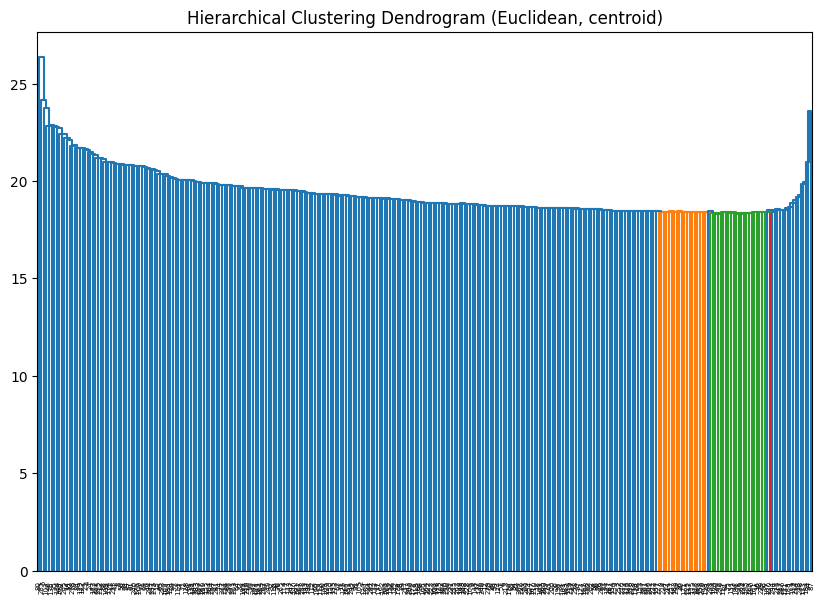

In [82]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_e_centroid)
plt.title('Hierarchical Clustering Dendrogram (Euclidean, centroid)')
plt.show()


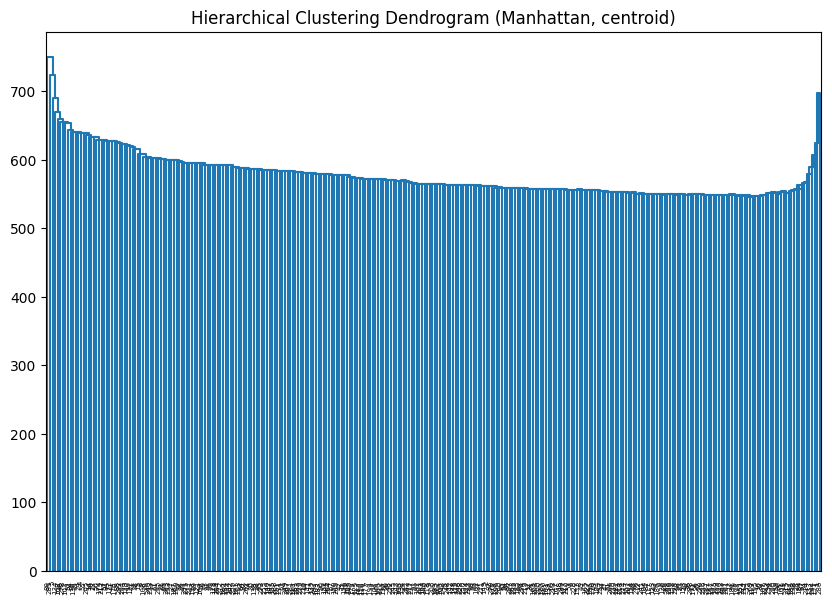

In [83]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z_m_centroid)
plt.title('Hierarchical Clustering Dendrogram (Manhattan, centroid)')
plt.show()

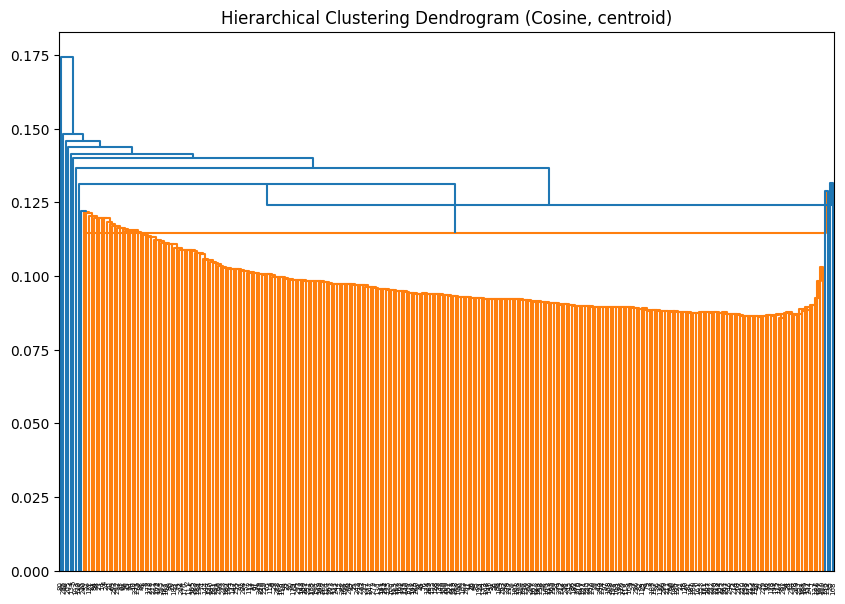

In [84]:
plt.figure(figsize=(10, 7))
dendrogram(Z_c_centroid)
plt.title('Hierarchical Clustering Dendrogram (Cosine, centroid)')
plt.show()

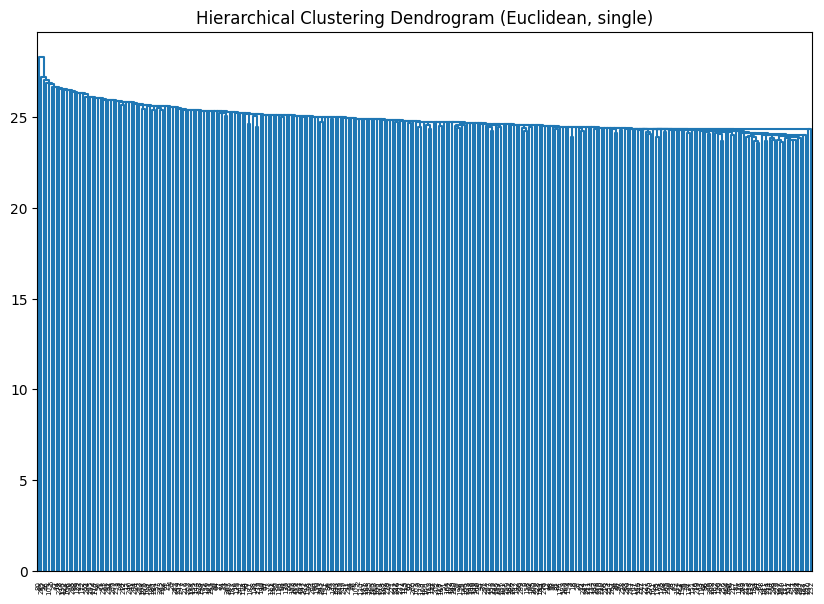

In [85]:
plt.figure(figsize=(10, 7))
dendrogram(Z_e_single)
plt.title('Hierarchical Clustering Dendrogram (Euclidean, single)')
plt.show()

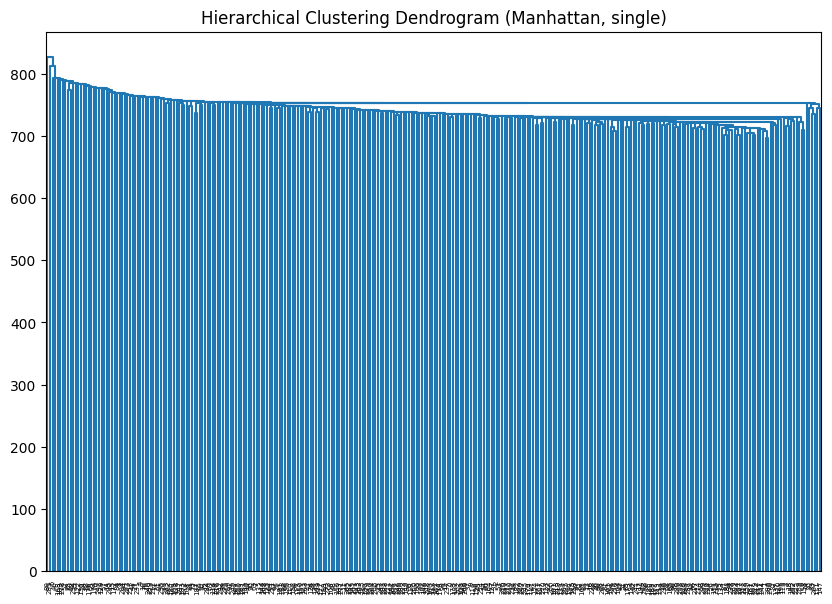

In [86]:
plt.figure(figsize=(10, 7))
dendrogram(Z_m_single)
plt.title('Hierarchical Clustering Dendrogram (Manhattan, single)')
plt.show()

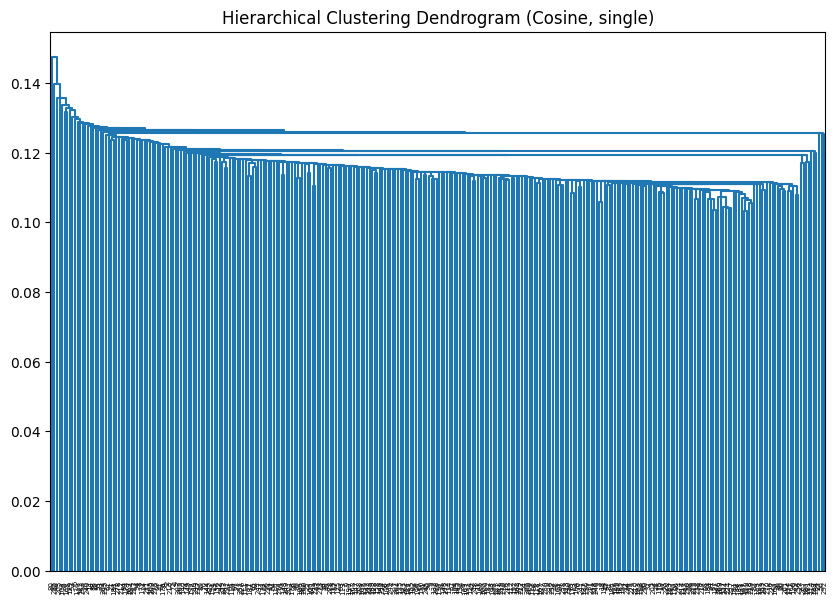

In [87]:
plt.figure(figsize=(10, 7))
dendrogram(Z_c_single)
plt.title('Hierarchical Clustering Dendrogram (Cosine, single)')
plt.show()

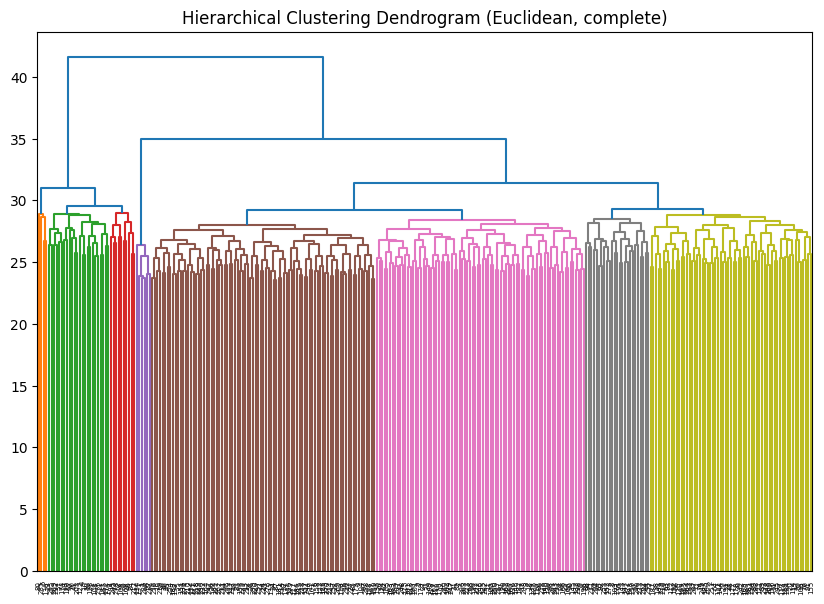

In [88]:
plt.figure(figsize=(10, 7))
dendrogram(Z_e_complete)
plt.title('Hierarchical Clustering Dendrogram (Euclidean, complete)')
plt.show()

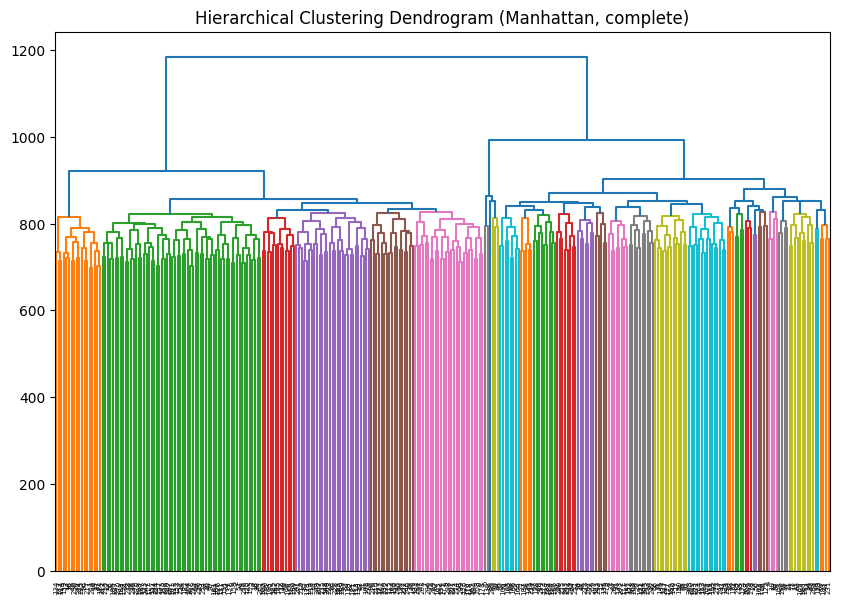

In [89]:
plt.figure(figsize=(10, 7))
dendrogram(Z_m_complete)
plt.title('Hierarchical Clustering Dendrogram (Manhattan, complete)')
plt.show()

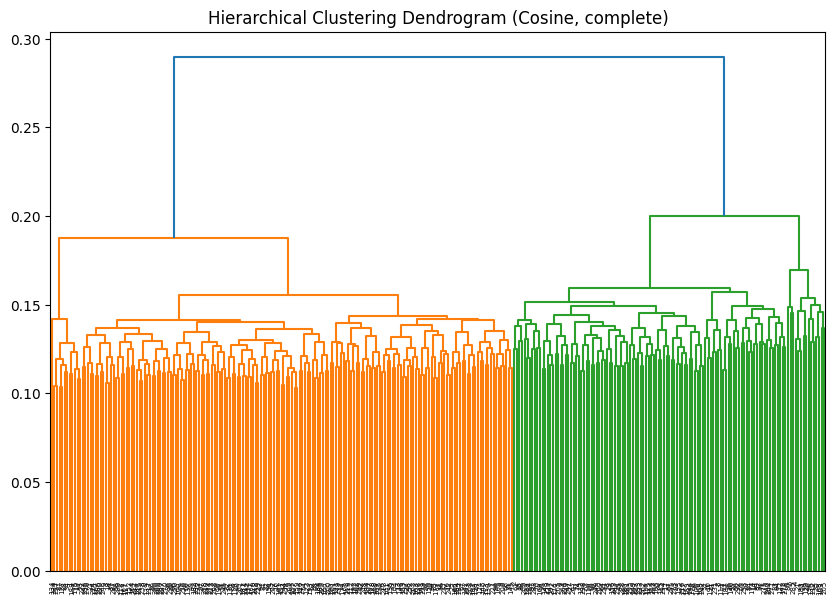

In [90]:
plt.figure(figsize=(10, 7))
dendrogram(Z_c_complete)
plt.title('Hierarchical Clustering Dendrogram (Cosine, complete)')
plt.show()